In [1]:
%cd C:\Users\debie\Documents\anaconda_space

C:\Users\debie\Documents\anaconda_space


# Finding Heavy Traffic Indicators on I-94

In this project we will analyze a dataset about the westbound traffic on the I-94 Interstate Highway which connect the Great Lakes and northern Great Plains regions of the United States.

The dataset documentation mentions that a station located approximately midway between Minneapolis and Saint Paul recorded the traffic data. Also, the station only records westbound traffic (cars moving from east to west).

The goal here is to find the indicators of heavy traffic on this highway.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

First let's look into the rows and columns of the dataset.

In [3]:
m_traff=pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
m_traff.head(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [4]:
m_traff.tail(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [5]:
m_traff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


From the commands above we can see that the dataframe contains the traffic volume for each hour between October 2nd of 2012 and September 30th of 2018. For each hour, there is also information about the day (if it is a holiday or not) and several information about the weather.

Let's now plot a histogram to visualize the distribution of the traffic volume.

<AxesSubplot:ylabel='Frequency'>

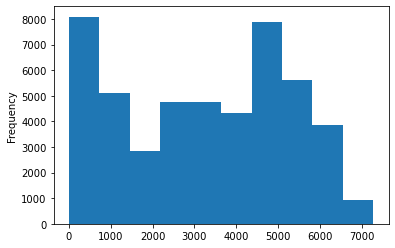

In [6]:
m_traff['traffic_volume'].plot.hist()

In [7]:
m_traff['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Our dataset contains the traffic data from every hour between 2012-10-02 09:00:00 and 2018-09-30 23:00:00. Between this 2 dates, the hourly traffic varies from 0 to 7280 cars, with an average of 3260 cars.

25% of the time there are less than 1193 cars per hour. Which means there are quite a lot of variation. It might mean that the traffic is quite lower during night time. Let's look into that.

We'll divide the dataset into 2 parts, daytime (between 7am and 7pm) an nighttime (between 7pm and 7am). To do that, we first need to change the data type of the date_time column.

In [8]:
m_traff['date_time']=pd.to_datetime(m_traff['date_time'])

In [9]:
day = m_traff.copy()[(m_traff['date_time'].dt.hour >= 7) & (m_traff['date_time'].dt.hour < 19)]
print(day.shape)

night = m_traff.copy()[(m_traff['date_time'].dt.hour >= 19) | (m_traff['date_time'].dt.hour < 7)]
print(night.shape)

(23877, 9)
(24327, 9)


And now we plot 2 histogram to visualize the distribution of the traffic volume, one during daytime and one during nighttime.

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

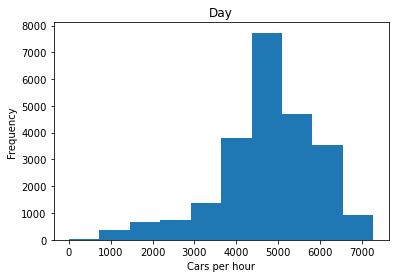

In [10]:
plt.hist(day['traffic_volume'])
plt.title('Day')
plt.xlabel('Cars per hour')
plt.ylabel('Frequency')
day['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

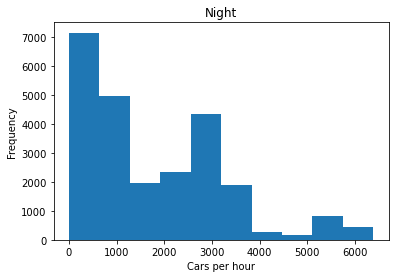

In [11]:
plt.hist(night['traffic_volume'])
plt.title('Night')
plt.xlabel('Cars per hour')
plt.ylabel('Frequency')
night['traffic_volume'].describe()

From the 2 histograms above we can see that there is usually more traffic during the day than during the night.
The mean value of cars per hour is 4762 in the day and 1785 in the night which confirms this observation.

During the day, 75% of the time there is more than 4000 cars per hour.

During the day, 75% of the tile there is less than 3000 cars per hour.


Now we'll look into the influence on the traffic volume that the following parameters have: the month, the day of the week and the time of the day.


For the month:

In [12]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

<AxesSubplot:xlabel='month'>

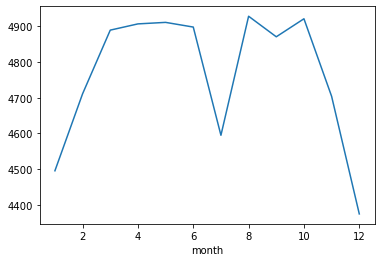

In [13]:
by_month['traffic_volume'].plot.line()

What we can observ is that the traffic volume has 2 periods in the year when it drops: during the winter season (November to February) and during a month in summer (July). It might correspond to te time when people go to vacation.

For the day of the week:

In [14]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

<AxesSubplot:xlabel='dayofweek'>

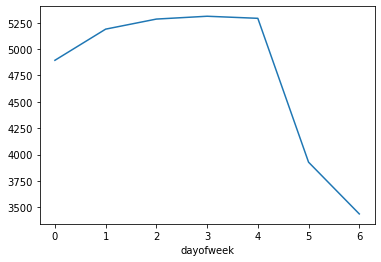

In [15]:
by_dayofweek['traffic_volume'].plot.line()

During the weekend there is much less traffic volume.

For the time of the day:

In [16]:
day['hour'] = day['date_time'].dt.hour
bussiness_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


(1300.0, 6500.0)

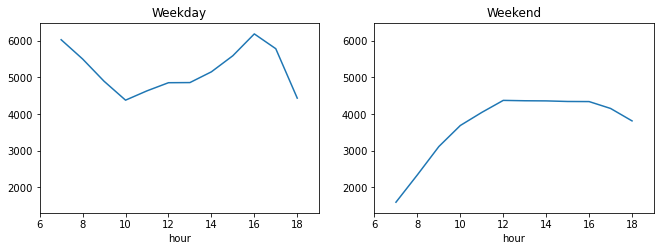

In [17]:
plt.figure(figsize=(11,3.5))

plt.subplot(1,2,1)
by_hour_business['traffic_volume'].plot.line()
plt.title('Weekday')
plt.xlim([6,19])
plt.ylim([1300,6500])

plt.subplot(1,2,2)
by_hour_weekend['traffic_volume'].plot.line()
plt.title('Weekend')
plt.xlim([6,19])
plt.ylim([1300,6500])

During weekdays, the rush are in the morning (7am to 8am) and in the end of the afternoon (4pm to 6pm).

During weekends, the rush are starting from noon and decrease a little starting 4pm.

The weekends rush are around the lowest traffic during weekdays.

Now, let's look into the influence of the weather.

Let's compute the correlation between the dataframe columns and the traffic volume:

In [18]:
day.corr()['traffic_volume']   

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

The weather column with the strongest correlation is 'temp' which is the temperature. Let's plot the temperature vs the traffic volume:

(230.0, 320.0)

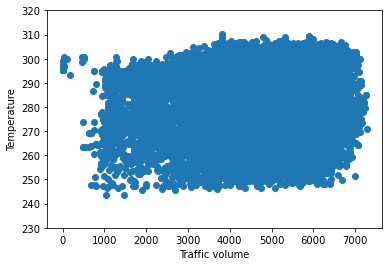

In [19]:
plt.scatter(day['traffic_volume'],day['temp'])
plt.xlabel('Traffic volume')
plt.ylabel('Temperature')
plt.ylim(230,320)

We'll now look next at the categorical weather-related columns: weather_main and weather_description to see if we can find more useful data.

In [20]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_description = day.groupby('weather_description').mean()

<AxesSubplot:ylabel='weather_main'>

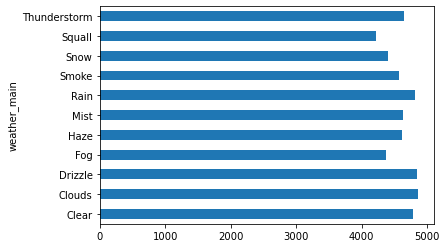

In [21]:
by_weather_main['traffic_volume'].plot.barh()

<AxesSubplot:ylabel='weather_description'>

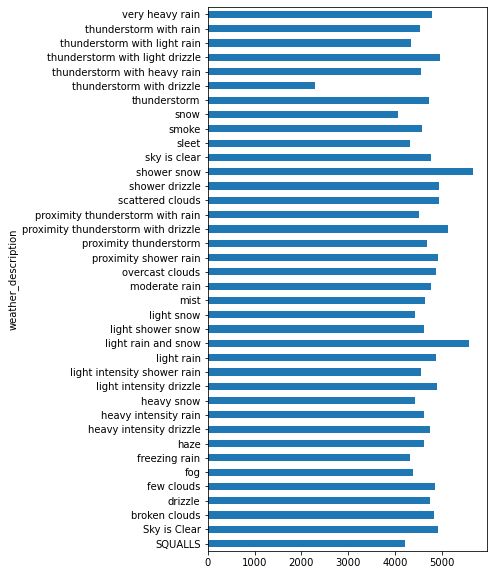

In [22]:
by_weather_description['traffic_volume'].plot.barh(figsize=(5,10))



It looks like there are three weather types where traffic volume exceeds 5,000:

    Shower snow
    Light rain and snow
    Proximity thunderstorm with drizzle

It's not clear why these weather types have the highest average traffic values — this is bad weather, but not that bad. Perhaps more people take their cars out of the garage when the weather is bad instead of riding a bike or walking.